In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box, Polygon, mapping, Point
from shapely.ops import unary_union
import shapely
from matplotlib import colors
import matplotlib.patches as mpatches
import contextily as ctx
import geemap.colormaps as cm

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize()

## Tomar los datos del IDE

In [4]:
gdf = gpd.read_file('datos/IPG2022_v2.shp')

In [5]:
gdf.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf.to_crs(4326, inplace=True)

In [7]:
gdf.head()

OBJECTID  Id       COD_GLA             NOMBRE           CLASIFICA  \
0       174   0  CL101010001@  VOLCAN PARINACOTA  GLACIAR DE MONTAÑA   
1       180   0  CL101001023@    VOLCAN POMERAPE  GLACIAR DE MONTAÑA   
2       183   0  CL101021004@                S/N          GLACIARETE   
3       184   0  CL101021007@                S/N          GLACIARETE   
4       185   0  CL101021008@                S/N          GLACIARETE   

   AREA_KM2              REGION   PROVINCIA COMUNA   DATUM  ... WGI_2  WGI_3  \
0  1.167625  ARICA Y PARINACOTA  PARINACOTA  PUTRE  WGS 84  ...     6      3   
1  0.477543  ARICA Y PARINACOTA  PARINACOTA  PUTRE  WGS 84  ...     9      6   
2  0.162167  ARICA Y PARINACOTA  PARINACOTA  PUTRE  WGS 84  ...     7      3   
3  0.093870  ARICA Y PARINACOTA  PARINACOTA  PUTRE  WGS 84  ...     9      6   
4  0.155676  ARICA Y PARINACOTA  PARINACOTA  PUTRE  WGS 84  ...     9      6   

   FRENTE_TER RESOL_IMG     ERROR  OBSERVACIO CUT_REG CUT_PROV CUT_COM  \
0      TIERRA      15.0  0.110762        None      15      152   15201   
1      TIERRA      15.0  0.088744        None      15      152   15201   
2      TIERRA      15.0  0.052476        None      15      152   15201   
3      TIERRA      15.0  0.019837        None      15      152   15201   
4      TIERRA      15.0  0.028012        None      15      152   15201   

                                            geometry  
0  POLYGON ((-69.14147 -18.16858, -69.14146 -18.1...  
1  POLYGON ((-69.13025 -18.12238, -69.13005 -18.1...  
2  POLYGON ((-69.09348 -18.42529, -69.09408 -18.4...  
3  POLYGON ((-69.08682 -18.42340, -69.08667 -18.4...  
4  POLYGON ((-69.08228 -18.42549, -69.08248 -18.4...  

[5 rows x 46 columns]

In [8]:
gdf.geometry

0        POLYGON ((-69.14147 -18.16858, -69.14146 -18.1...
1        POLYGON ((-69.13025 -18.12238, -69.13005 -18.1...
2        POLYGON ((-69.09348 -18.42529, -69.09408 -18.4...
3        POLYGON ((-69.08682 -18.42340, -69.08667 -18.4...
4        POLYGON ((-69.08228 -18.42549, -69.08248 -18.4...
                               ...                        
26175    POLYGON ((-70.31693 -34.05208, -70.31705 -34.0...
26176    POLYGON ((-70.31906 -34.05275, -70.31904 -34.0...
26177    POLYGON ((-70.31403 -34.03018, -70.31401 -34.0...
26178    MULTIPOLYGON (((-73.46304 -49.80103, -73.46517...
26179    POLYGON ((-73.26105 -49.15879, -73.42250 -49.1...
Name: geometry, Length: 26180, dtype: geometry

In [9]:
gdf.REGION.unique()

array(['ARICA Y PARINACOTA', 'TARAPACA', 'ANTOFAGASTA', 'ATACAMA',
       'COQUIMBO', 'VALPARAISO', 'METROPOLITANA DE SANTIAGO',
       'LIBERTADOR BERNARDO O HIGGINS', 'DEL MAULE', 'ARAUCANIA',
       'LOS RIOS', 'LOS LAGOS',
       'AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO',
       'MAGALLANES Y ANTARTICA CHILENA', 'ÑUBLE', 'BIOBIO'], dtype=object)

### Filtrado de datos

In [10]:
analisis = gdf[(gdf['REGION'] == 'AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO') & (gdf['NOMBRE'] == 'VOLCAN HUDSON')].reset_index(drop=True)

In [11]:
analisis.head()

OBJECTID  Id       COD_GLA         NOMBRE           CLASIFICA   AREA_KM2  \
0     10237   0  CL111500096@  VOLCAN HUDSON    GLACIAR DE VALLE   5.321582   
1     10346   0  CL111404037@  VOLCAN HUDSON    GLACIAR DE VALLE  79.101040   
2     10350   0  CL111412018@  VOLCAN HUDSON  GLACIAR DE MONTAÑA   1.455223   
3     10351   0  CL111412022@  VOLCAN HUDSON    GLACIAR DE VALLE   4.301715   
4     10046   0  CL111404036@  VOLCAN HUDSON  GLACIAR DE MONTAÑA   3.338888   

                                      REGION        PROVINCIA      COMUNA  \
0  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO  GENERAL CARRERA  RIO IBAÑEZ   
1  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO            AYSEN       AYSEN   
2  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO            AYSEN       AYSEN   
3  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO            AYSEN       AYSEN   
4  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO            AYSEN       AYSEN   

    DATUM  ... WGI_2  WGI_3  FRENTE_TER RESOL_IMG     ERROR  OBSERVACIO  \
0  WGS 84  ...     2      0      TIERRA      15.0  0.419083        None   
1  WGS 84  ...     6      0      TIERRA      15.0  1.546303        None   
2  WGS 84  ...     6      0      TIERRA      15.0  0.130385        None   
3  WGS 84  ...     6      0      TIERRA      15.0  0.192619        None   
4  WGS 84  ...     7      0      TIERRA      15.0  0.179781        None   

  CUT_REG CUT_PROV CUT_COM                                           geometry  
0      11      114   11402  POLYGON ((-72.88995 -45.91595, -72.89037 -45.9...  
1      11      112   11201  POLYGON ((-73.07847 -45.86575, -73.07778 -45.8...  
2      11      112   11201  POLYGON ((-72.98633 -45.97025, -72.98661 -45.9...  
3      11      112   11201  POLYGON ((-72.95399 -45.96017, -72.95155 -45.9...  
4      11      112   11201  POLYGON ((-72.98585 -45.85726, -72.98558 -45.8...  

[5 rows x 46 columns]

In [12]:
analisis.columns

Index(['OBJECTID', 'Id', 'COD_GLA', 'NOMBRE', 'CLASIFICA', 'AREA_KM2',
       'REGION', 'PROVINCIA', 'COMUNA', 'DATUM', 'HUSO', 'NORTE', 'ESTE',
       'FUENTE_DIG', 'FUEN_FECHA', 'INVE_FECHA', 'NOM_CUEN', 'COD_CUEN',
       'COD_SCUEN', 'COD_SSCUEN', 'MZON_GLAC', 'CH_CASQ', 'CUBIERTO',
       'LATITUD', 'LONGITUD', 'PERIMETRO', 'ORIENTA', 'HMEDIA', 'HMAX', 'HMIN',
       'PENDIENTE', 'ESP_MED', 'F_ESP_MED', 'VOL_km3', 'EQ_AGUAKM3', 'WGI_1',
       'WGI_2', 'WGI_3', 'FRENTE_TER', 'RESOL_IMG', 'ERROR', 'OBSERVACIO',
       'CUT_REG', 'CUT_PROV', 'CUT_COM', 'geometry'],
      dtype='object')

### Obtener AOI e imagenes 

In [13]:
polygon = analisis.iloc[0].geometry

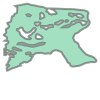

In [14]:
polygon

### Obtener un conjunto de glaciares cercanos al elegido

In [15]:
def lineas(row):
    nearestpoint,  = shapely.ops.nearest_points(row['geometry_x'], row['geometry_y'])
    return LineString([nearest_point, row['geometry_y']])

def find_nearest_and_distance(row):
    point1, point2 = shapely.ops.nearest_points(row['geometry'], polygon)
    distance = point1.distance(point2)
    return point1, point2, distance

gdf[['nearest_point', 'nearest_glaciar', 'distance']] = gdf.apply(lambda row: pd.Series(find_nearest_and_distance(row)), axis=1)




In [16]:
big_glacial = unary_union(gdf.sort_values(by='distance')[:120].geometry)


In [17]:
def getAOI_latlon(dat):
    aoi = ee.Geometry.Polygon(dat)
    return(aoi)
    

In [18]:
aoi = getAOI_latlon(mapping(big_glacial.boundary)['coordinates'])

In [19]:
aoi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -72.95936732830359,
              -46.04180672789923
            ],
            [
              -72.95952230306773,
              -46.041247357457365
            ],
            [
              -72.95984138694023,
              -46.0398950050314
            ],
            [
              -72.96072965636051,
              -46.038875181335996
            ],
            [
              -72.96073181749858,
              -46.03870713132289
            ],
            [
              -72.96042025983714,
              -46.038503152534716
            ],
            [
              -72.9602992077932,
              -46.038034857692615
            ],
            [
              -72.96025817938198,
              -46.03732807935799
            ],
            [
              -72.95968381120666,
              -46.037080736582595
            ],
            [
              -72.95967409977017,
              -46.03663906136424
            ],
            [
              -72.95972110098734,
              -46.03637831879015
            ],
            [
              -72.96002245337402,
              -46.036002058433745
            ],
            [
              -72.96005197375008,
              -46.03580289010188
            ],
            [
              -72.96018846886746,
              -46.03556952544095
            ],
            [
              -72.9604749995503,
              -46.035399559515895
            ],
            [
              -72.96051452195009,
              -46.035175801357745
            ],
            [
              -72.9604406284919,
              -46.03499973815749
            ],
            [
              -72.96053032201715,
              -46.03329384073111
            ],
            [
              -72.96048128063077,
              -46.03299070570991
            ],
            [
              -72.96093496326799,
              -46.03281679670272
            ],
            [
              -72.96091012385507,
              -46.03349191484183
            ],
            [
              -72.96143656876052,
              -46.03417860785994
            ],
            [
              -72.96159850664849,
              -46.03453021647608
            ],
            [
              -72.96199581174594,
              -46.03482602218959
            ],
            [
              -72.96208953718866,
              -46.03517999752923
            ],
            [
              -72.96199390994884,
              -46.0357548868141
            ],
            [
              -72.961308203684,
              -46.036207368885044
            ],
            [
              -72.96108473397233,
              -46.03642946391162
            ],
            [
              -72.96069240866373,
              -46.03668123526875
            ],
            [
              -72.96075031957874,
              -46.03701263970991
            ],
            [
              -72.96114423875007,
              -46.03726093589107
            ],
            [
              -72.96143582862655,
              -46.03751278223678
            ],
            [
              -72.96178544090448,
              -46.03761972163367
            ],
            [
              -72.96236872899408,
              -46.0376471002948
            ],
            [
              -72.96297932531989,
              -46.037578265796064
            ],
            [
              -72.96345177585829,
              -46.03749041130451
            ],
            [
              -72.9639327303161,
              -46.037521335343556
            ],
            [
              -72.96433695666545,
              -46.03743584706282
            ],
            [
              -72.96442907940258,
              -46.03728975481579
            ],
            [
              -72.96507548057077,
              -46.0372434810

In [20]:
dates = ['2018', '2019']

### Seleccionamos Imagenes y aplicamos los escalamientos necesario

In [21]:
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )
def cloudmask(image):
    cloudShadowBitmask = 1 << 3
    cloudBitmask = 1 << 5

    qa = image.select('QA_PIXEL')
    mask = qa.bitwiseAnd(cloudShadowBitmask).eq(0)
    mask = mask.bitwiseAnd(cloudBitmask).eq(0)
    return image.updateMask(mask)

In [22]:
dataset = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filter(ee.Filter.lt('CLOUD_COVER', 20)).filterBounds(aoi).filterDate(
    dates[0], dates[1]).map(cloudmask).map(apply_scale_factors)

In [23]:
def aplicar_aoi(image, aoi=aoi):
    image = image.clip(aoi)
    return image

In [24]:
dataset = dataset.map(aplicar_aoi)

### Determinar un area para visualizar el glacial y no tener toda la imagen

In [25]:

glaciar = [[-73.2062204552081,-46.15011764265802],
[-72.64454442981747,-46.15011764265802],
[-72.64454442981747,-45.758670847843604],
[-73.2062204552081,-45.758670847843604],
[-73.2062204552081,-46.15011764265802]]

In [26]:
aoi_glaciar = getAOI_latlon(glaciar)

In [27]:
dates = ['2018-01-01', '2019-01-12']

In [28]:
dataset_glaciar = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filter(ee.Filter.lt('CLOUD_COVER', 20)).filterBounds(aoi_glaciar).filterDate(
    dates[0], dates[1]).map(cloudmask).map(apply_scale_factors)

In [29]:
imagen_analisis = dataset_glaciar.median()

### Visualizacion previa de la imagen (RGB)

In [30]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)


vis_params = {"min": 0.0, "max": 0.15 ,"bands": ['SR_B4', 'SR_B3', 'SR_B2']}

Map.addLayer(imagen_analisis.clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

In [31]:
imagen_analisis

# Otener el NDGI

 (B3 – B4) / (B3 + B4)

In [32]:
ndgi = imagen_analisis.normalizedDifference(['SR_B3', 'SR_B4']).rename('NDGI')

In [33]:
imagen_analisis = imagen_analisis.addBands(ndgi)

In [34]:
ndgi_palette = [
    'blue',
    'orange',
    'red',
    'yellow',
       
    'white', # Valores medios
    'green'  # Valores altos
]

In [35]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)

# vis_params = {"min": 0.0, "max": 0.15 ,"bands": ['SR_B4', 'SR_B3', 'SR_B2'], 'alpha': 0.6}

# Map.addLayer(dataset_glaciar.first().clip(aoi_glaciar), vis_params=vis_params)

vis_params = {"min": 0, "max": 0.4 ,"bands": ['NDGI'], "palette": ndgi_palette}

Map.addLayer(imagen_analisis.clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

In [36]:
mask = ndgi.gte(0)

In [37]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)


vis_params = {"min": 0, "max": 1 ,"bands": ['NDGI'], "palette": ndgi_palette}

Map.addLayer(ndgi.updateMask(mask).clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

NDSI (Landsat 8) = (B3 – B6) / (B3 + B6)

In [38]:
ndsi = imagen_analisis.normalizedDifference(['SR_B3', 'SR_B6']).rename('NDSI')

In [39]:
imagen_analisis = imagen_analisis.addBands(ndsi)

In [40]:
mask_ndsi = ndsi.gte(0)

In [41]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)


vis_params = {"min": -1, "max": 1 ,"bands": ['NDSI'], "palette": ndgi_palette}

Map.addLayer(ndsi.updateMask(mask_ndsi).clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

In [42]:
ndwi = imagen_analisis.normalizedDifference(['SR_B3', 'SR_B5']).rename('NDWI')

In [43]:
mask = ndwi.gte(0.2)

### Kmeans-clasificator

In [44]:
Map.addLayer(ee.Image().paint(aoi_glaciar, 0, 2), {}, 'region');

training = imagen_analisis.select(['NDGI', 'NDSI']).sample(
  region = aoi_glaciar,
  scale = 30,
  numPixels = 5000
);

clusterer = ee.Clusterer.wekaKMeans(4).train(training);

result = imagen_analisis.select(['NDGI', 'NDSI']).cluster(clusterer);

Map.addLayer(result.clip(aoi_glaciar).randomVisualizer(), {}, 'clusters');

In [45]:
class_counts = result.reduceRegion(
  reducer = ee.Reducer.frequencyHistogram(),
  geometry = aoi_glaciar,
  scale = 30,
  bestEffort = True
);

class_counts

In [46]:
clase_especifica = 0; 
clase_mask = result.eq(clase_especifica);

clase_especifica_image = result.updateMask(clase_mask);

Map.addLayer(clase_especifica_image.clip(aoi_glaciar), {'palette': ['red']}, 'Clase Específica');

In [47]:
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

## Obtenemos el Area (Km^2) del glacial

In [48]:
clase_especifica = 0; 

clase_mask = result.eq(clase_especifica);

pixel_area = ee.Image.pixelArea()

clase_especifica_area = pixel_area.updateMask(clase_mask);

area = clase_especifica_area.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoi_glaciar,
    maxPixels=1e8,
)

result_area = area.getNumber('area').divide(1e6)
result_area

## Visualizacion de la clasificacion

In [49]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)


vis_params = {"min": 0.0, "max": 0.15 ,"bands": ['SR_B4', 'SR_B3', 'SR_B2']}

Map.addLayer(imagen_analisis.clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(clase_especifica_image.clip(aoi_glaciar), {'palette': ['red']}, 'Clase Específica');
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

In [50]:
imagen_analisis_agua = imagen_analisis.addBands(ndwi)

In [51]:
Map = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)


vis_params = {"min": 0.2, "max": 1 ,"bands": ['NDWI'], "palette": ndgi_palette}

Map.addLayer(ndwi.updateMask(mask).clip(aoi_glaciar), vis_params=vis_params)
Map.addLayer(aoi, name='area')
Map

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…

In [52]:
Map_elev = geemap.Map(center=[-45.9270950841735, -72.89091994152835], zoom=12)
dataset = ee.Image('CSP/ERGo/1_0/Global/SRTM_mTPI');
srtmMtpi = dataset.select('elevation');
srtmMtpiVis = {
  'min': -200.0,
  'max': 200.0,
  'palette': ['0b1eff', '4be450', 'fffca4', 'ffa011', 'ff0000'],
};
Map_elev.setCenter(-72.89091994152835, -45.9270950841735, zoom=12);
Map_elev.addLayer(srtmMtpi, srtmMtpiVis, 'SRTM mTPI');

## Intentar estimar el volumen.

In [53]:
Map_elev

Map(center=[-45.9270950841735, -72.89091994152835], controls=(WidgetControl(options=['position', 'transparent_…